# Part 1

### Exercise 1

Text(0, 0.5, 'Average Life Expectancy')

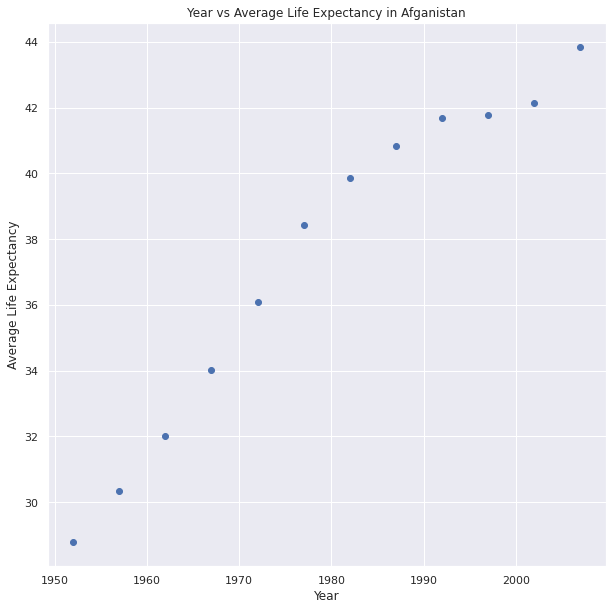

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sklearn.linear_model as sk
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import sklearn.datasets as skd
from sklearn.model_selection import KFold
import sklearn.metrics as skm
import sklearn.ensemble as rf
import sklearn.discriminant_analysis as lda
import scipy.stats as ss
import statsmodels.api as sm
from sklearn.feature_selection import chi2

data = pd.read_csv("08_gap.tsv", sep='\t')
afg = data.loc[data['country'] == "Afghanistan"]
plt.figure(figsize=(10,10))
plt.scatter('year','lifeExp',data=afg, marker = 'o')

plt.title('Year vs Average Life Expectancy in Afganistan')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')

### Question 1

In general, from interpreting the scatter plot above visually, there seems to be a trend showing an increase in average life expectancy as the years increase to the present. The trend looks mostly linear, but may have a slight curve, indicating it could be a higher degree polynomial relationship.

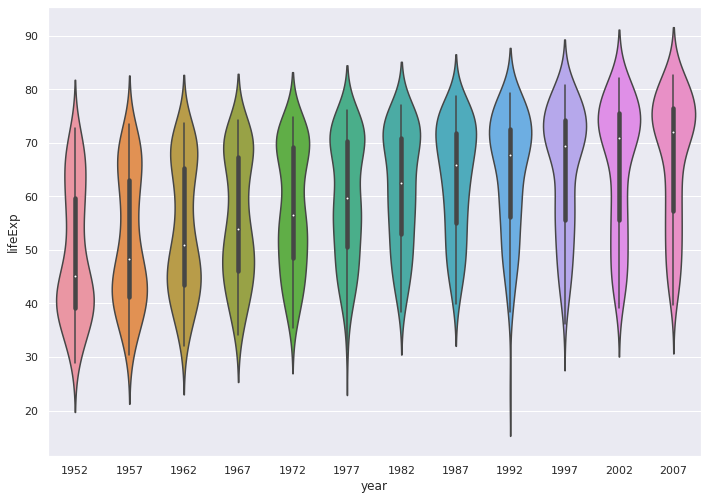

In [2]:
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
seaborn.violinplot(x="year",y="lifeExp",data = data)

### Question 2

The distribution of average life expectancy across countries for the years plotted all seem to be skewed, the direction in which it is skewed depends on the year. In general, from the 50's to the early 70's life expectancy was skewed below the mean. These years also seemed to be bimodal, with a peak around the 25th and 75th quartiles. There is also some symmetry about the mean in the 70's. Post 80's, however, the distribution seemed to change to be skewed towards a higher life expectancy and was unimodal. This trend becomes stronger as you observe years closer to the present.

### Question 3

If you were to fit a linear regression model onto life expectancy vs year, the null hypothesis of no relationship would most likely be rejected. There seems to be a strong positive relationship between life expectancy and years, so the hypothesis test would most likely show significant evidence that the relationship exists.

### Question 4

If you were to create a violin plot of the residuals of the linear regression model created vs. year, the violin plot would most likely look like a reversal of the plot created earlier, with values skewed towards positive residuals in the beginning years, even distribution in the 80's, then values skewed towards negative residuals when near the present.

### Question 5

If the assumptions of Linear regression were satisfied, the population the sample was taken from must be normal. This would cause the violin plot of the residuals vs year to be evenly distributed about 0 on the y axis, with each violin being unimodal about the mean. If this is not the case, then the population may not be normally distributed and the assumptions may be violated.

### Exercise 2

In [25]:
reg = sk.LinearRegression().fit(data['year'].values.reshape(-1, 1),data['lifeExp'])
print("LifeExp = "+str(round(reg.coef_[0],4))+"*year + "+str(round(reg.intercept_,4)))

mod = sm.OLS(data['year'].values.reshape(-1, 1),data['lifeExp'])
fii = mod.fit()
p_values = fii.summary2()
print(p_values)

LifeExp = 0.3259*year + -585.6522
                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.956     
Dependent Variable:     y                AIC:                         25365.2819
Date:                   2020-12-03 22:11 BIC:                         25370.7227
No. Observations:       1704             Log-Likelihood:              -12682.   
Df Model:               1                F-statistic:                 3.743e+04 
Df Residuals:           1703             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.956            Scale:                       1.7063e+05
------------------------------------------------------------------------------------
                 Coef.      Std.Err.        t         P>|t|       [0.025      0.975]
------------------------------------------------------------------------------------
lifeExp         31.8110       0.1644     193.4706     0.0000     31.4885     32.1335
---

### Question 6

On average the life expectancy around the world increase by .3259 years per year. 

### Question 7

I would reject the Null hypothesis of no relationship. If you conduct a t-test on the linear regression model, the p-value comes out to 0, which is lower than any alpha that could be used, so the null hypothesis should be rejected, showing there is a relationship.

### Exercise 3

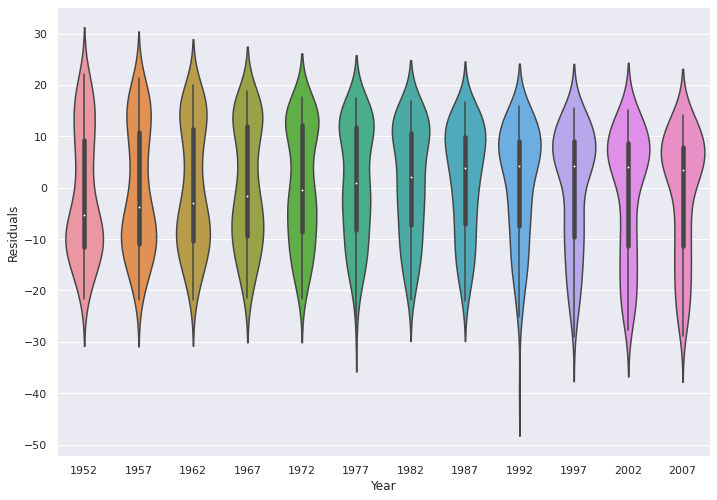

In [4]:
cols = {
    'Year' : data['year'],
    'Actual' : data['lifeExp'],
    'Predicted' : data['year'].map(lambda x: x*reg.coef_[0] + reg.intercept_),
    'Residuals' : data['lifeExp'] - data['year'].map(lambda x: x*reg.coef_[0] + reg.intercept_),
    'Continent' : data['continent']
    }
res = pd.DataFrame(cols ,columns = ['Year','Actual','Predicted','Residuals','Continent'])
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
seaborn.violinplot(x="Year",y="Residuals",data = res)

### Question 8

No, the plot did not look as expected. I predicted the plot would look like a reversal of the original violin plot, but in Exercise 3, the plot looks very similar to the first violin plot graphed. My expectations were that the Linear Regression would favor life expectancies below the mean in the beginning years, then higher than the mean in the later years, but it seems the regression stayed about the mean each year.

### Exercise 4

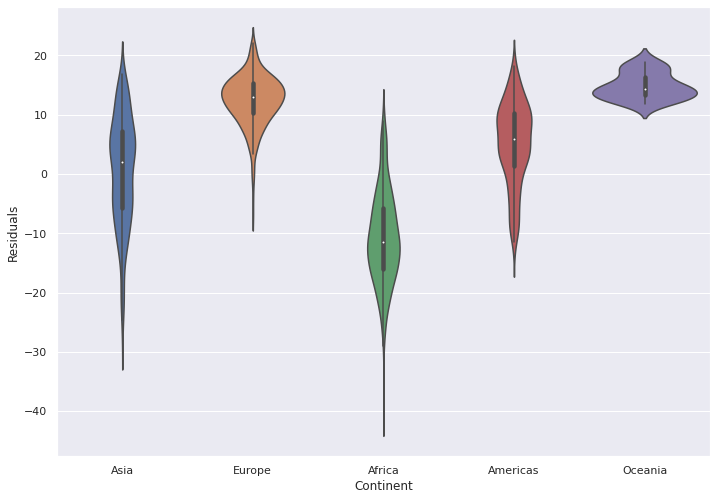

In [5]:
seaborn.violinplot(x="Continent",y="Residuals",data = res)

### Question 9

There does seem to be a dependence between continent and residuals from the linear regression. For example, Africa is distributed mostly in the negative region, meaning their average life expectancy is lower than the overall regression, and in Oceania, the distribution is entirely in the positive region, meaning their life expectancy is always higher than what the overall regression predicts. Other than what value the continents are distributed about, the distributions seem almost normal. When performing a regression analysis on life expectancy among time, it would most likely be best to separate the continents, or make it another predictor variable since there is clearly a relationship.

### Exercise 5

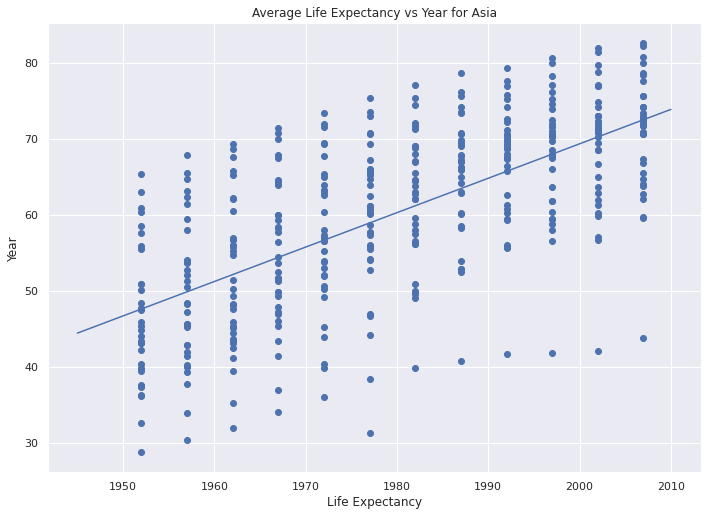

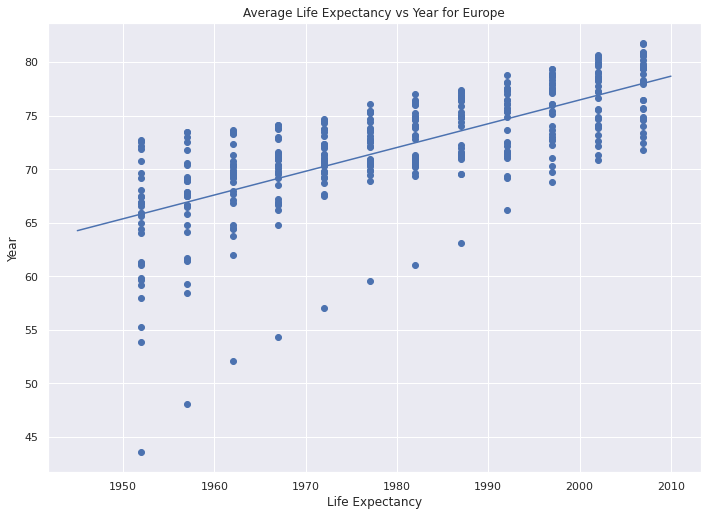

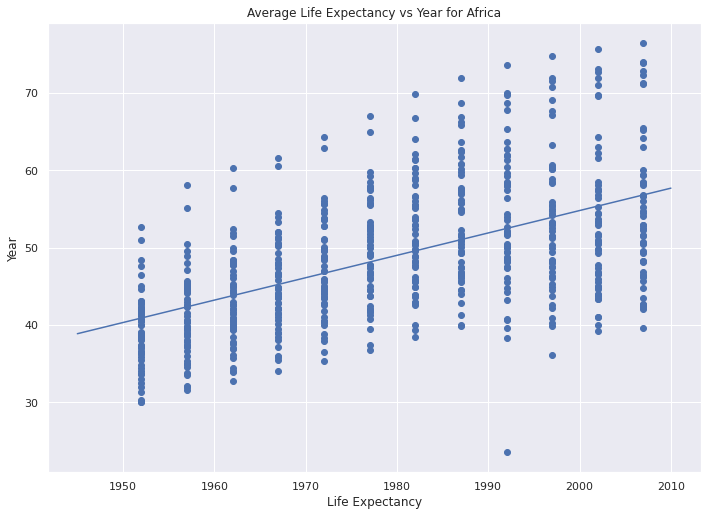

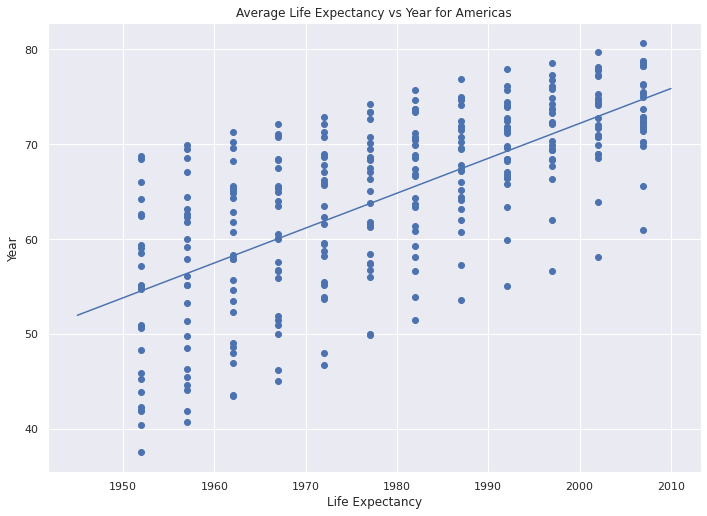

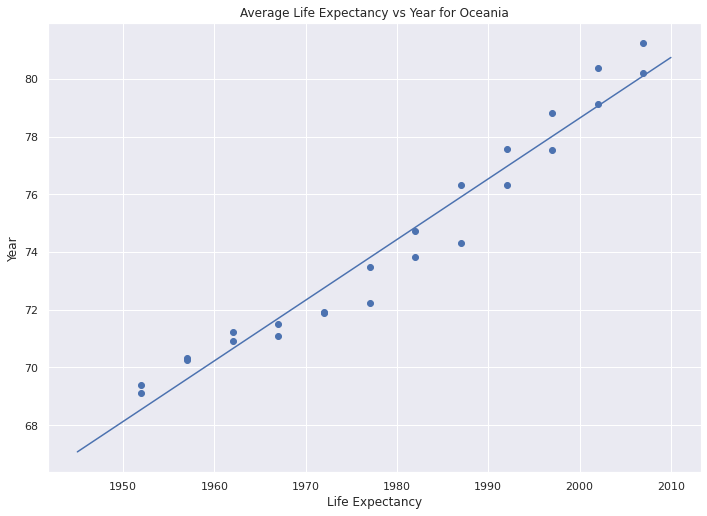

In [6]:
continents = data['continent'].unique()
by_cont = data #data.groupby(['year','continent']).mean().reset_index()
for x in continents:
    sep = by_cont.loc[by_cont['continent'] == x]
    reg = sk.LinearRegression().fit(sep['year'].values.reshape(-1, 1),sep['lifeExp'])
    plt.scatter('year','lifeExp', data=sep, marker='o')
    plt.title('Average Life Expectancy vs Year for ' + x)
    plt.ylabel('Year')
    plt.xlabel('Life Expectancy')
    x = np.linspace(1945,2010,1000)
    plt.plot(x,x*reg.coef_ + reg.intercept_)
    plt.show()
    

### Question 10

Yes, there should be an interaction term between continent and year since the distribution of life expectancies changes as a function of year and the life expectancy also changes as a function of continent. When incorporating an interaction term between country and year, you are able to give more accurate predictions of life expectancy, leading to less skewed data.

### Exercise 6

In [49]:
keys = {}
for x in range(0,len(continents)):
    keys[continents[x]] = x
vals = list(keys.values())
inter = data.copy()
inter['continent'] = data['continent'].map(lambda x: keys[x])
dat = []
for index, row in inter.iterrows():
    dat.append([row['year'],row['continent']])
interaction = PolynomialFeatures(include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(dat)
model = sk.LinearRegression().fit(X_inter,inter['lifeExp'])
print("ContinentNums:")
print(keys)
print("\nLifeExp = "+str(round(model.coef_[0],4))+"*Year + " + str(round(model.coef_[1],4))+"*ContinentNum + " 
                    + str(round(model.coef_[2],4))+"*Year*ContinentNum + " +str(round(model.intercept_,4)))
X_inter = pd.DataFrame(X_inter, columns = ["year",'continent','y*c'])
X_inter = X_inter[['year','continent','y*c']]
X_inter = sm.add_constant(X_inter)
mod = sm.OLS(inter['lifeExp'],X_inter,)
fii = mod.fit()
p_values = fii.summary()
print(p_values)

ContinentNums:
{'Asia': 0, 'Europe': 1, 'Africa': 2, 'Americas': 3, 'Oceania': 4}

LifeExp = 0.3698*Year + 55.5315*ContinentNum + -0.0287*Year*ContinentNum + -670.5137
                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     145.5
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           6.53e-84
Time:                        23:14:00   Log-Likelihood:                -6582.4
No. Observations:                1704   AIC:                         1.317e+04
Df Residuals:                    1700   BIC:                         1.319e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

### Question 11

Yes, all parameters in the model are significantly different from 0 at a 10% confidence level. If that confidence level were to change to a lower number, such as .05, the continent and year*continent interaction variable would no longer be significant though, since their p-values > .05.

### Question 12

For each continent and year, the life expectancy seems to be increasing at a rate of -0.0287.

### Exercise 8

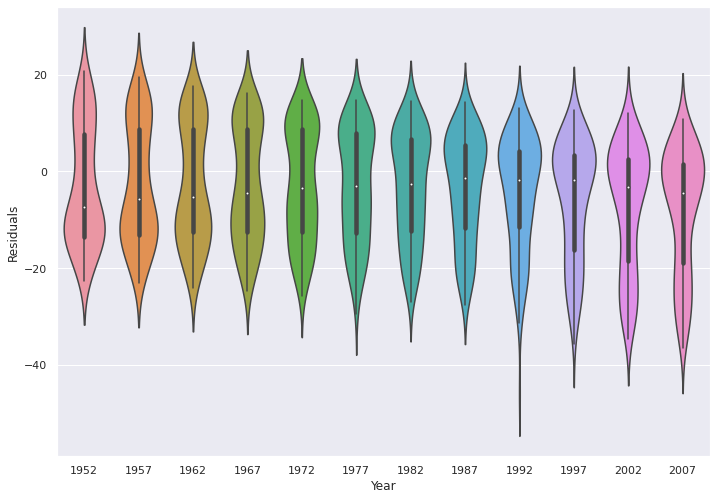

In [8]:
cols = {
    'Year' : inter['year'],
    'Actual' : inter['lifeExp'],
    'Predicted' : inter['year'].map(lambda x: x*model.coef_[0] + model.intercept_),
    'Residuals' : inter['lifeExp'] - inter['year'].map(lambda x: x*model.coef_[0] + model.intercept_) 
                                    + inter['continent'].map(lambda x: x*model.coef_[1])
                                    + (inter['year']*inter['continent']*model.coef_[2]),
    'Continent' : inter['continent']
    }
res = pd.DataFrame(cols ,columns = ['Year','Actual','Predicted','Residuals','Continent'])
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
seaborn.violinplot(x="Year",y="Residuals",data = res)

# Part 2

In [9]:
def grad_descent(X, y, T, alpha):
    m, n = X.shape 
    theta = np.zeros(n)
    f = np.zeros(T) 
    for i in range(T):
        f[i] = 0.5*np.linalg.norm(X.dot(theta) - y)**2
        # compute steepest ascent at f(theta)
        g = np.transpose(X).dot(X.dot(theta) - y)
        # step down the gradient
        theta = theta - (alpha*g)
    return theta, f

### Problem 2

### Problem 3

In [10]:
#The gradient descent is implemented below in the stochastic version, where the only
#difference from the linear regression gradient descent is the g value in the for loop
def log_grad_descent(X, y, T, alpha):
    m, n = X.shape 
    beta = np.zeros(n)
    f = np.zeros(T) 
    for i in range(T):
        #A squared error loss function is still used
        f[i] = 0.5*np.linalg.norm(X.dot(beta) - y)**2
        
        # compute steepest ascent at f(beta)
        #the linear regression model is changed here to reflect a logistic gradient descent
        #given the derived gradient descent update equation, g would now be
        # xT.*(y - (e^ x .* B)/1 + e^ x .* B)
        g = np.transpose(X).dot(y - (np.exp(X.dot(beta))/(1+np.exp(X.dot(beta)))))
        
        # step down the gradient
        beta = beta + (alpha*g)
    return beta, f
        

### Problem 4

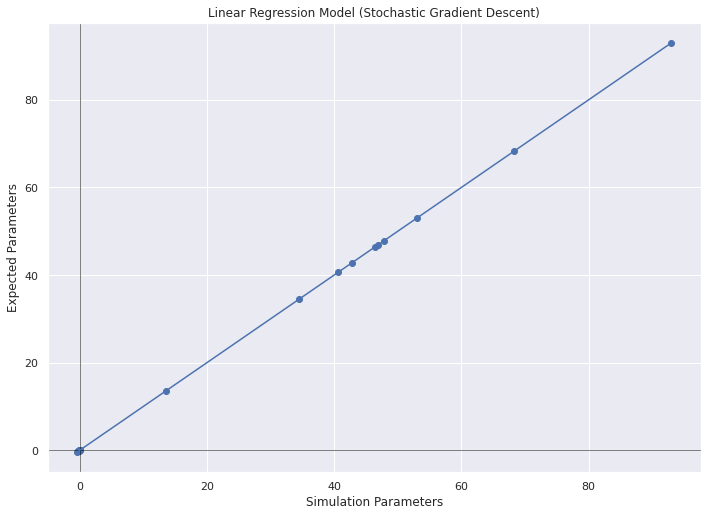

In [11]:
#creating data then fitting our model and sklearn's model onto the simulation
gen_data_x, gen_data_y = skd.make_regression(n_samples=100, n_features=20, noise = 1.5)
model = sk.LinearRegression().fit(gen_data_x,gen_data_y)
sim = grad_descent(gen_data_x,gen_data_y,40000,.00002)

#Formatting plots
plt.scatter(model.coef_,sim[0])
plt.title("Linear Regression Model (Stochastic Gradient Descent)")
plt.ylabel('Expected Parameters')
plt.xlabel('Simulation Parameters')
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)

#Used to visualize what the Expected Parameter vs Simulated Parameter graph would look
#in the ideal scenario, where they are equal to each other, if scatter plot is along line
#this shows our model is very similar to the sklearn model
x = np.linspace(min(min(model.coef_),min(sim[0])),max(max(model.coef_),max(sim[0])),5000)
plt.plot(x,x)
plt.show()

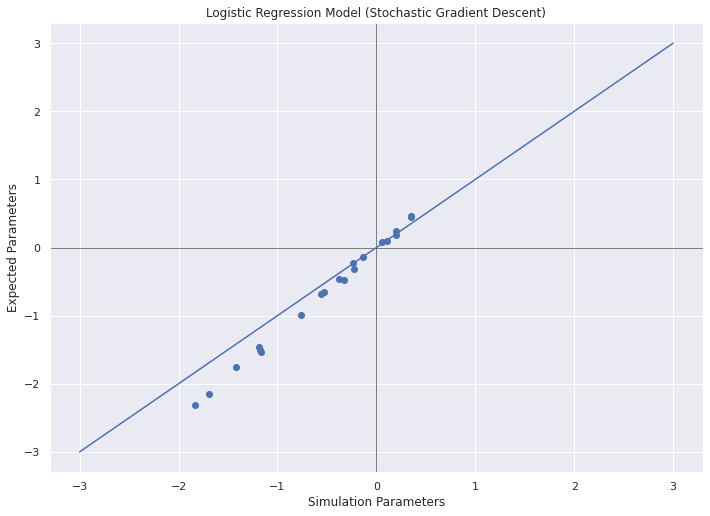

In [12]:
#creating data then fitting our model and sklearn's model onto the simulation
log_gen_data_x, dump_y = skd.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]
model = sk.LogisticRegression().fit(log_gen_data_x,log_gen_data_y)
sim = log_grad_descent(log_gen_data_x,log_gen_data_y,40000,.00002)

#Formatting plots
plt.scatter(model.coef_[0],sim[0])
plt.title("Logistic Regression Model (Stochastic Gradient Descent)")
plt.ylabel('Expected Parameters')
plt.xlabel('Simulation Parameters')
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)

#Used to visualize what the Expected Parameter vs Simulated Parameter graph would look
#in the ideal scenario, where they are equal to each other, if scatter plot is along line
#this shows our model is very similar to the sklearn model
x = np.linspace(-3,3,1000)
plt.plot(x,x)
plt.show()

# Try it Yourself

For this section of the notebook, I will be comparing the Logistic Regression with Stochastic Gradient descent that I have implemented with Random Forest Classification and Linear Discriminant Analysis from sklearn. The Random Forest Classification will have a maximum of 100 trees in the forest per iteration, and will have no depth limit. The Logistic Regression's stochastic gradient descent will have 200 steps and a step size of (0.00000000000005). The dataset I will be testing each algorithm on is a Loan information database taken from kaggle. In this database, the classification variable is whether or not the individual applying for a loan defaults or not. There are many explanatory variables provided in the dataset, but the ones I have chosen to predict whether an individual will default on their loan or not are:
-The number of children they have
-Their total income
-Their credit
-Their Annuity
-The price of the good they are requesting a loan for
-Their Age
-The length of their current employment
-The number of family members they live with
-The rating of the region the client lives in (rated by the loan provider)
-The rating of the city the client lives in (rated by the loan provider)

In [13]:
#Loading data from csv uploaded into notebook directory
loans = pd.read_csv("application_data.csv")

#from this dataframe, only the features that will be used for the model are extracted
#with Target being out classification variable and the others being the predictors
cleaned = {'Target':loans["TARGET"],
          'Num_Children':loans["CNT_CHILDREN"],
          'Total_Income':loans['AMT_INCOME_TOTAL'],
          'Credit':loans['AMT_CREDIT'],
          'Annuity':loans['AMT_ANNUITY'],
          'Price':loans['AMT_GOODS_PRICE'],
          "Age":loans['DAYS_BIRTH'],
          'Employment':loans['DAYS_EMPLOYED'],
          'Family_Mems':loans['CNT_FAM_MEMBERS'],
          'Region_Score':loans['REGION_RATING_CLIENT'],
          'City_Score':loans['REGION_RATING_CLIENT_W_CITY']}

#The dataframe is extremely large so I sampled only 10,000 values from the entire csv,
#reindexed the df then dropped any rows with null values to prevent runtime errors
cleaned = pd.DataFrame(cleaned).sample(10000).reset_index(drop=True).dropna()

#the new dataframe is then written to csv to prevent having to run this cell again
cleaned.to_csv('cleaned.csv')
cleaned.head()

,Target,Num_Children,Total_Income,Credit,Annuity,Price,Age,Employment,Family_Mems,Region_Score,City_Score
0,0,0,135000.0,1129500.0,60178.5,1129500.0,-15684,-5815,2.0,2,2
1,0,0,121500.0,545040.0,25407.0,450000.0,-13465,-3128,2.0,2,2
2,0,1,36000.0,152820.0,8901.0,135000.0,-15356,-1296,2.0,2,2
3,0,0,135000.0,93829.5,8734.5,81000.0,-21018,365243,2.0,2,2
4,0,1,135000.0,391090.5,20605.5,297000.0,-11378,-1768,3.0,2,2


In [17]:
#folding the dataset that is being used 10 times, 9 training 1 test
kf = KFold(n_splits=10)

#arrays that hold accuracy scores of models throughout each iteration of the kFold
score_lgd = []
score_rf = []
score_lda = []

#strings that hold the result of the paired ttest between my model and the other models selected
ttest_lgd_rf = ""
ttest_lgd_lda = ""

X = cleaned

#Loop that trains a model on the 9 training sets for each of the 10 splits, then tests it on the 1 test set
#Loop also measures accuracy scores based on % guessed correctly in the test.

for train_index, test_index in kf.split(X):
    Y = cleaned['Target']
    X = cleaned.drop(columns = ['Target'])
    
    #tranform the dataset to only include rows from the training set created by the split
    train_set_x = X.iloc[train_index]
    train_set_y = Y.iloc[train_index]
    
    #holds the rows from the original dataset that will be used as the testing set 
    test_x = X.iloc[test_index]
    test_y = Y.iloc[test_index]
    
    #Creating logistic regression model based on training set specified above
    #with 200 steps and alpha step of .00000000000005 (these were found to be the
    #best parameters where NaN's were not created)
    model_lgd = log_grad_descent(train_set_x, train_set_y, 200, .00000000000005)
    #After finding betas, we dot them by the test set to get a scalar value for each observation
    y_pred_lgd = test_x.dot(model_lgd[0])
    #the scalar values are then put back into the sigmoid function to produce a value between 0 and 1
    y_pred_lgd = 1/(1+np.exp(-1*y_pred_lgd))
    #After getting the value [0,1], a basic threshold function is given as x >= .5 = 1 and x < .5 = 0
    #And a classification is assigned 
    y_pred_lgd = [0 if x < .5 else 1 for x in y_pred_lgd]
    #the classifications are then compared to the true classifications in the given test set and the scores
    #are appended to the score matrix for the regression
    score_lgd.append(skm.accuracy_score(test_y,y_pred_lgd))
    
    #a random forest classifier is then trained on the same data set
    model_rf = rf.RandomForestClassifier().fit(train_set_x,train_set_y)
    y_pred_rf = model_rf.predict(test_x)
    #After getting a prediction from the random forest, the same threshold function is applied
    #And classifications are given
    y_pred_rf = [0 if x < .5 else 1 for x in y_pred_rf]
    #The same accuracy function is used to score the random forest and the values are appended to the score matrix
    score_rf.append(skm.accuracy_score(test_y,y_pred_rf))
    
    #A linear discriminant Analysis is also fit onto the same training data
    model_lda = lda.LinearDiscriminantAnalysis().fit(train_set_x,train_set_y)
    y_pred_lda = model_lda.predict(test_x)
    #After getting a prediction from the LDA, the same threshold function is applied
    #And classifications are given
    y_pred_lda = [0 if x < .5 else 1 for x in y_pred_lda]
    #The same accuracy function is used to score the LDA and the values are appended to the score matrix
    score_lda.append(skm.accuracy_score(test_y,y_pred_lda))
    
#After completing the 10-kFold cross validation, a t-test is conducted on the matrix of scores between
#the random forest classifier and the logistic regression to see if there there is any significant difference
#between the accuracy of the models
if ss.ttest_rel(score_lgd,score_rf)[1] < .05:
    ttest_lgd_rf = "Reject Null"
else:
    ttest_lgd_rf = "Accept Null"

#the same as above is done for the logistic regression and the linear discriminant analysis
if ss.ttest_rel(score_lgd,score_lda)[1] < .05:
        ttest_lgd_lda = "Reject Null"
else:
        ttest_lgd_lda = "Accept Null"
    
print("Average Accuracy Score Logistic Regression (Over 10-kFold): "+str(sum(score_lgd)/len(score_lgd)))
print("Average Accuracy Score Random Forest (Over 10-kFold): "+str(sum(score_rf)/len(score_rf)))
print("Average Accuracy Score Linear Discriminant Analysis (Over 10-kFold): "+str(sum(score_lda)/len(score_lda))) 
print("\nPaired T-test between Logistic & RF Predicted Values (Alpha = .05): \n")
print(ttest_lgd_rf)
print("\nPaired T-test between Logistic & LDA Predicted Values (Alpha = .05): \n")
print(ttest_lgd_lda)

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Average Accuracy Score Logistic Regression (Over 10-kFold): 0.8919235235235237
Average Accuracy Score Random Forest (Over 10-kFold): 0.9170489489489488
Average Accuracy Score Linear Discriminant Analysis (Over 10-kFold): 0.9175491491491492

Paired T-test between Logistic & RF Predicted Values (Alpha = .05): 

Accept Null

Paired T-test between Logistic & LDA Predicted Values (Alpha = .05): 

Accept Null
